In [2]:
import sys
import os
import ctypes


# Get the absolute path of the utils directory
utils_path = os.path.abspath("lib")
sys.path.append(utils_path)
%load_ext autoreload
%autoreload 2

In [3]:
class mrh:
    def __init__(self, *args, **kwargs):
        pass

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qiskit.qpy as qpy
import pickle
import json
import matplotlib.patches as mpatches
from numba import njit
from numba.typed import List
from plotting import *
from readings import *
from tile_process import *

In [5]:
N = 24; f_orbs = (2,2,2,2,2,2)
seam_lst = [8,16]
epsilon = 0.001
prehead = "../data_H_12_uniform/"
uop, all_g = read_uop(1.5, epsilon,prehead)
# excitations = to_numba_typed_list(excitations)


Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH


In [6]:
print(uop.a_idxs)
print(all_g)
print(uop.a_idxs[-1])

[array([2], dtype=uint8), array([14], dtype=uint8), array([2], dtype=uint8), array([14], dtype=uint8), array([3], dtype=uint8), array([15], dtype=uint8), array([3], dtype=uint8), array([15], dtype=uint8), array([4], dtype=uint8), array([16], dtype=uint8), array([4], dtype=uint8), array([16], dtype=uint8), array([4], dtype=uint8), array([16], dtype=uint8), array([4], dtype=uint8), array([16], dtype=uint8), array([5], dtype=uint8), array([17], dtype=uint8), array([5], dtype=uint8), array([17], dtype=uint8), array([5], dtype=uint8), array([17], dtype=uint8), array([5], dtype=uint8), array([17], dtype=uint8), array([6], dtype=uint8), array([18], dtype=uint8), array([6], dtype=uint8), array([18], dtype=uint8), array([6], dtype=uint8), array([18], dtype=uint8), array([6], dtype=uint8), array([18], dtype=uint8), array([6], dtype=uint8), array([18], dtype=uint8), array([6], dtype=uint8), array([18], dtype=uint8), array([7], dtype=uint8), array([19], dtype=uint8), array([7], dtype=uint8), array

[-1.7507550133679675e-08, -1.750755013323072e-08, -3.0373158918395366e-05, -3.037315891839323e-05, -2.8320351953660728e-05, -2.832035195366088e-05, 9.382237723838327e-08, 9.38223772381732e-08, 6.409281650624395e-10, 6.409281650522222e-10, 3.0231501897937022e-06, 3.023150189793744e-06, 1.5059762037749432e-09, 1.5059762045999268e-09, -2.8435844442879003e-05, -2.8435844442877922e-05, 2.65096186028437e-06, 2.6509618602842823e-06, -9.197271736864484e-09, -9.197271736869976e-09, -2.839434695388607e-05, -2.8394346953886407e-05, 3.487648774876234e-09, 3.487648774658546e-09, 3.4922129324745806e-10, 3.492212932403708e-10, 4.49162246349204e-07, 4.491622463492158e-07, 2.234495398893796e-10, 2.234495398911266e-10, -2.6450210398167044e-06, -2.645021039816695e-06, 6.873882431139566e-15, 6.874275454427092e-15, 2.854818778026519e-05, 2.8548187780265128e-05, -3.7348821146274735e-07, -3.734882114627709e-07, 9.79502172217738e-10, 9.795021722182276e-10, 2.6596493129298517e-06, 2.6596493129299474e-06, -7.26

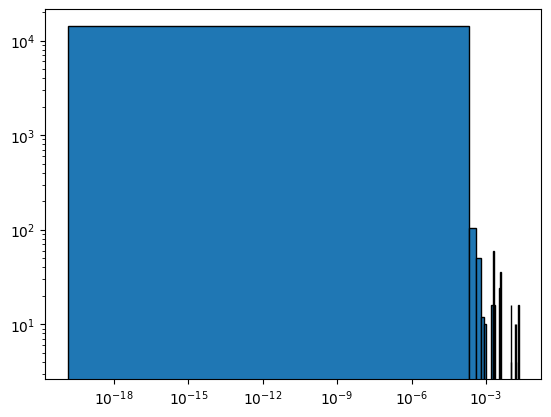

In [7]:
gradient = [x[0] for x in all_g]
print(gradient)
gradient = np.array(gradient)
gradient = abs(gradient)
plt.hist(abs(gradient), bins=100, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
print(max(gradient))
print(uop.a_idxs)

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
[[-2.458181247675343e-08, 0], [-2.4581812476302833e-08, 1], [-3.4458688586343884e-05, 2], [-3.445868858634532e-05, 3], [-3.4408990200624566e-05, 4], [-3.4408990200625854e-05, 5], [-2.114110826626797e-08, 6], [-2.1141108266484386e-08, 7], [2.2392288129458054e-09, 8], [2.239228812945808e-09, 9], [-5.044739568661902e-08, 10], [-5.044739568661493e-08, 11], [2.302538862841205e-10, 12], [2.3025388629172436e-10, 13], [-4.1111488449425295e-07, 14], [-4.1111488449424655e-07, 15], [4.725926920692141e-08, 16], [4.725926920692484e-08, 17], [-6.160690464813026e-10, 18], [-6.160690464813438e-10, 19], [4.109888778740713e-07, 20], [4.109888778740716e-07, 21], [-2.3258173540865314e-10, 22], [-2.3258173541040847e-10, 23], [4.024362456321087e-12, 24], [4.024362456375629e-12, 25], [-3.9500675431513373e-10, 26], [-3.950067543149923e-10, 27], [2.222454995058596e-09, 28], [2.2224549950586764e-09, 29], [4.7281398136798064e-08, 3

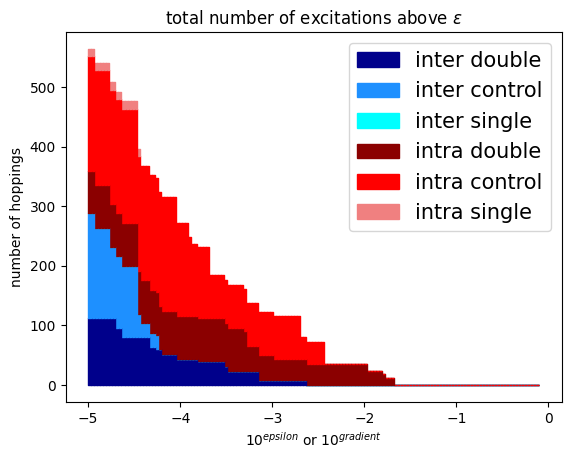

-5.0


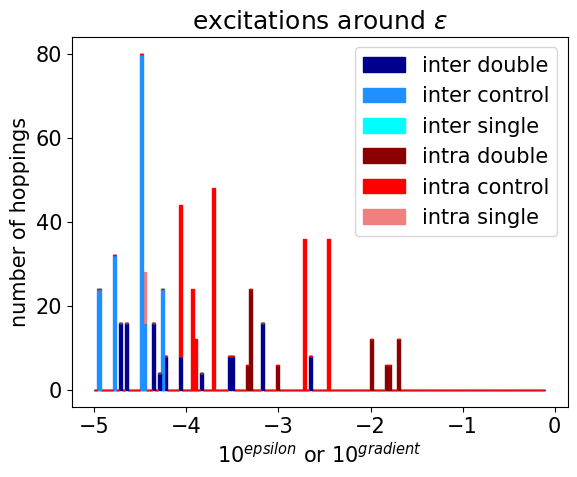

In [8]:
def plot_uop(uop, all_g, epsilon_min, seam_lst, epsilon_lst, f_orbs, total = True, ifinter = True, ifintra = True):
    e_min = np.log10(epsilon_min)//1
    print(e_min)
    nbins = len(epsilon_lst) - 1
    intra_double = np.zeros(nbins)
    inter_double = np.zeros(nbins)
    intra_control = np.zeros(nbins)
    inter_control = np.zeros(nbins)
    intra_single = np.zeros(nbins)
    inter_single = np.zeros(nbins)
    a_index = uop.a_idxs
    i_index = uop.i_idxs
    for epsilon_index in range(len(epsilon_lst) - 1):
        epsilon_min = epsilon_lst[epsilon_index+1]
        if total:
            epsilon_max = np.inf
        else:
            epsilon_max = epsilon_lst[epsilon_index]
        for [gradient, i] in all_g:
            gradient = abs(gradient)
            if gradient > epsilon_min and gradient < epsilon_max:
                cur_index = epsilon_index
                cur_a = a_index[i].copy()
                cur_i = i_index[i].copy()
                cur_excitation = [[cur_a, cur_i]]
                cur_excitation = orbital_reordering(cur_excitation,f_orbs)
                cur_a, cur_i = cur_excitation[0]
                # print(cur_a, cur_i)
                if len(cur_a) == 1:
                    if cur_a == cur_i:
                        print("single evolution")
                    else:
                        # print("single hopping")
                        i1 = min([cur_a[0], cur_i[0]])
                        i2 = max([cur_a[0], cur_i[0]])
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_single[cur_index] += 1
                        else:
                            intra_single[cur_index] += 1
                if len(cur_a) == 2:
                    cur_a.sort()
                    cur_i.sort()
                    p,q = cur_a
                    k,m = cur_i
                    if set(cur_a) & set(cur_i) != set():
                        j = list(set(cur_a) & set(cur_i))
                        j = j[0]
                        p,q = list(set(cur_a) ^ set(cur_i))
                        i1 = min([p,q,j])
                        i2 = max([p,q,j])
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_control[cur_index] += 1
                        else:
                            intra_control[cur_index] += 1
                    else:
                        index_lst = [p,q,k,m]
                        index_lst.sort()
                        i1,i2,i3,i4 = index_lst
                        if (i1 < seam_lst[0] and i4>=seam_lst[0]) or (i1 < seam_lst[1] and i4>=seam_lst[1]):
                            inter_double[cur_index] += 1
                        else:
                            intra_double[cur_index] += 1
    colors = ["darkblue", "dodgerblue", "cyan", "darkred", "red", "lightcoral"]
    for i in range(nbins):
        start = 0
        if ifinter:
            # Plot inter hopping
            plt.fill_betweenx([start, start+inter_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[0])
            start += inter_double[i]
            
            plt.fill_betweenx([start, start+inter_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[1])
            start += inter_control[i]

            plt.fill_betweenx([start, start+inter_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[2])
        if ifintra:
            # Intra hopping
            plt.fill_betweenx([start, start+intra_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[3])
            start += intra_double[i]

            plt.fill_betweenx([start, start+intra_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[4])
            start += intra_control[i]
            if intra_single[i]!=0:
                plt.fill_betweenx([start, start+intra_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[5])
                start += intra_single[i]

    if not ifintra:
        legend_handles = [
        mpatches.Patch(color=colors[0], label='inter double'),
        mpatches.Patch(color=colors[1], label='inter control'),
        mpatches.Patch(color=colors[2], label='inter single'),
    ]
    elif not ifinter:
        legend_handles = [
        mpatches.Patch(color=colors[3], label='intra double'),
        mpatches.Patch(color=colors[4], label='intra control'),
        mpatches.Patch(color=colors[5], label='intra single'),
    ]
    else:
        legend_handles = [
            mpatches.Patch(color=colors[0], label='inter double'),
            mpatches.Patch(color=colors[1], label='inter control'),
            mpatches.Patch(color=colors[2], label='inter single'),
            mpatches.Patch(color=colors[3], label='intra double'),
            mpatches.Patch(color=colors[4], label='intra control'),
            mpatches.Patch(color=colors[5], label='intra single'),
        ]
    if total:
        if not ifintra:
            plt.title(r"total number of inter-module excitations above $\epsilon$")
        elif not ifinter:
            plt.title(r"total number of intra-module excitations above $\epsilon$")
        else:
            plt.title(r"total number of excitations above $\epsilon$")
    else:
        if not ifintra:
            plt.title(r"inter-module excitations around $\epsilon$")
        elif not ifinter:
            plt.title(r"intra-module excitations around $\epsilon$")
        else:
            plt.title(r"excitations around $\epsilon$")
    plt.rcParams.update({'font.size': 15})  # Update font size
    plt.legend(handles=legend_handles)
    plt.xlabel(r"$10^{epsilon}$ or $10^{gradient}$")
    plt.ylabel("number of hoppings")
    plt.show()

    return inter_single, intra_single, inter_control, intra_control, inter_double, intra_double
epsilon = 0.001
read_epsilon = 1.0
distance = 1.5
distance = float(distance)
prehead = "../data_H_12/"
uop, all_g = read_uop(distance, 0.0, prehead)
print(all_g)
epsilon_lst = [3e-3, 1e-3, 7e-4, 5e-4, 3e-4, 1e-4, 7e-5, 5e-5, 3e-5, 1e-5]
# epsilon_lst = [1e-3, 7e-4, 5e-4]
epsilon_lst = np.linspace(0.1,5,150)
epsilon_lst = 10**-(epsilon_lst)
f_orbs = [2,2,2,2,2,2]
epsilon_lst = np.array(epsilon_lst)
seam_lst = [8,16]
# seam_lst = [12,12]
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=True)
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=False)

# inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, [8,16],epsilon_lst, f_orbs)

In [12]:
def plot_fig3(uop, all_g, epsilon_min, seam_lst, epsilon_lst, f_orbs, total = True, ifinter = True, ifintra = True):
    e_min = np.log10(epsilon_min)//1
    print(e_min)
    nbins = len(epsilon_lst) - 1
    intra_double = np.zeros(nbins)
    inter_double = np.zeros(nbins)
    intra_control = np.zeros(nbins)
    inter_control = np.zeros(nbins)
    intra_single = np.zeros(nbins)
    inter_single = np.zeros(nbins)
    a_index = uop.a_idxs
    i_index = uop.i_idxs
    for epsilon_index in range(len(epsilon_lst) - 1):
        epsilon_min = epsilon_lst[epsilon_index+1]
        if total:
            epsilon_max = np.inf
        else:
            epsilon_max = epsilon_lst[epsilon_index]
        for [gradient, i] in all_g:
            gradient = abs(gradient)
            if gradient > epsilon_min and gradient < epsilon_max:
                cur_index = epsilon_index
                cur_a = a_index[i].copy()
                cur_i = i_index[i].copy()
                cur_excitation = [[cur_a, cur_i]]
                cur_excitation = orbital_reordering(cur_excitation,f_orbs)
                cur_a, cur_i = cur_excitation[0]
                # print(cur_a, cur_i)
                if len(cur_a) == 1:
                    if cur_a == cur_i:
                        print("single evolution")
                    else:
                        # print("single hopping")
                        i1 = min([cur_a[0], cur_i[0]])
                        i2 = max([cur_a[0], cur_i[0]])
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_single[cur_index] += 1
                        else:
                            intra_single[cur_index] += 1
                if len(cur_a) == 2:
                    cur_a.sort()
                    cur_i.sort()
                    p,q = cur_a
                    k,m = cur_i
                    if set(cur_a) & set(cur_i) != set():
                        j = list(set(cur_a) & set(cur_i))
                        j = j[0]
                        p,q = list(set(cur_a) ^ set(cur_i))
                        i1 = min([p,q,j])
                        i2 = max([p,q,j])
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_control[cur_index] += 1
                        else:
                            intra_control[cur_index] += 1
                            
                    else:
                        index_lst = [p,q,k,m]
                        index_lst.sort()
                        i1,i2,i3,i4 = index_lst
                        if (i1 < seam_lst[0] and i4>=seam_lst[0]) or (i1 < seam_lst[1] and i4>=seam_lst[1]):
                            inter_double[cur_index] += 1
                        else:
                            intra_double[cur_index] += 1
    colors = ["darkblue", "dodgerblue", "cyan", "darkred", "red", "lightcoral"]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), dpi=300)
    for i in range(nbins):
        start = 0
        # Plot inter hopping
        ax1.fill_betweenx([start, start+inter_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[0])
        start += inter_double[i]
        if inter_control[i]!=0:
            ax1.fill_betweenx([start, start+inter_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[1])
            start += inter_control[i]
        if inter_single[i]!=0:
            ax1.fill_betweenx([start, start+inter_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[2])
        # Intra hopping
        start = 0
        ax2.fill_betweenx([start, start+intra_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[3])
        start += intra_double[i]
        if intra_control[i]!=0:
            ax2.fill_betweenx([start, start+intra_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[4])
            start += intra_control[i]
        if intra_single[i]!=0:
            ax2.fill_betweenx([start, start+intra_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[5])
            start += intra_single[i]

    inter_legend_handles = [
    mpatches.Patch(color=colors[0], label='Inter Double'),
    mpatches.Patch(color=colors[1], label='Inter Control'),
    mpatches.Patch(color=colors[2], label='Inter Single'),
    ]
    intra_legend_handles = [
    mpatches.Patch(color=colors[3], label='Intra Double'),
    mpatches.Patch(color=colors[4], label='Intra Control'),
    mpatches.Patch(color=colors[5], label='Intra Single'),
    ]
    plt.rcParams.update({'font.size': 15})  # Update font size
    ax1.legend(handles=inter_legend_handles)
    ax2.legend(handles=intra_legend_handles)
    fig.supxlabel(r"$\log{\epsilon}$")
    fig.supylabel("Number of Hoppings")
    plt.tight_layout()
    plt.show()

    return inter_single, intra_single, inter_control, intra_control, inter_double, intra_double

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
[[-2.8656498188279453e-07, 0], [-2.865649818778123e-07, 1], [-3.5750601312576075e-05, 2], [-3.575060131257953e-05, 3], [-3.5741794065985006e-05, 4], [-3.574179406598751e-05, 5], [-2.8448723922279377e-07, 6], [-2.844872392256669e-07, 7], [6.959645000561742e-10, 8], [6.959645000578682e-10, 9], [-1.600517494246405e-07, 10], [-1.6005174942463596e-07, 11], [1.55618355487985e-09, 12], [1.5561835548676219e-09, 13], [-3.9109184868169743e-08, 14], [-3.910918486813698e-08, 15], [-9.245745363450318e-08, 16], [-9.245745363449862e-08, 17], [1.5179052440242747e-09, 18], [1.5179052440242714e-09, 19], [3.860468750584545e-08, 20], [3.860468750582719e-08, 21], [-1.5521028715561577e-09, 22], [-1.5521028715595324e-09, 23], [1.730304199812143e-10, 24], [1.7303041997994416e-10, 25], [-1.949436844344158e-08, 26], [-1.949436844343934e-08, 27], [3.8152641081491307e-10, 28], [3.8152641080990356e-10, 29], [-9.299497742697654e-08, 3

<Figure size 1920x1440 with 0 Axes>

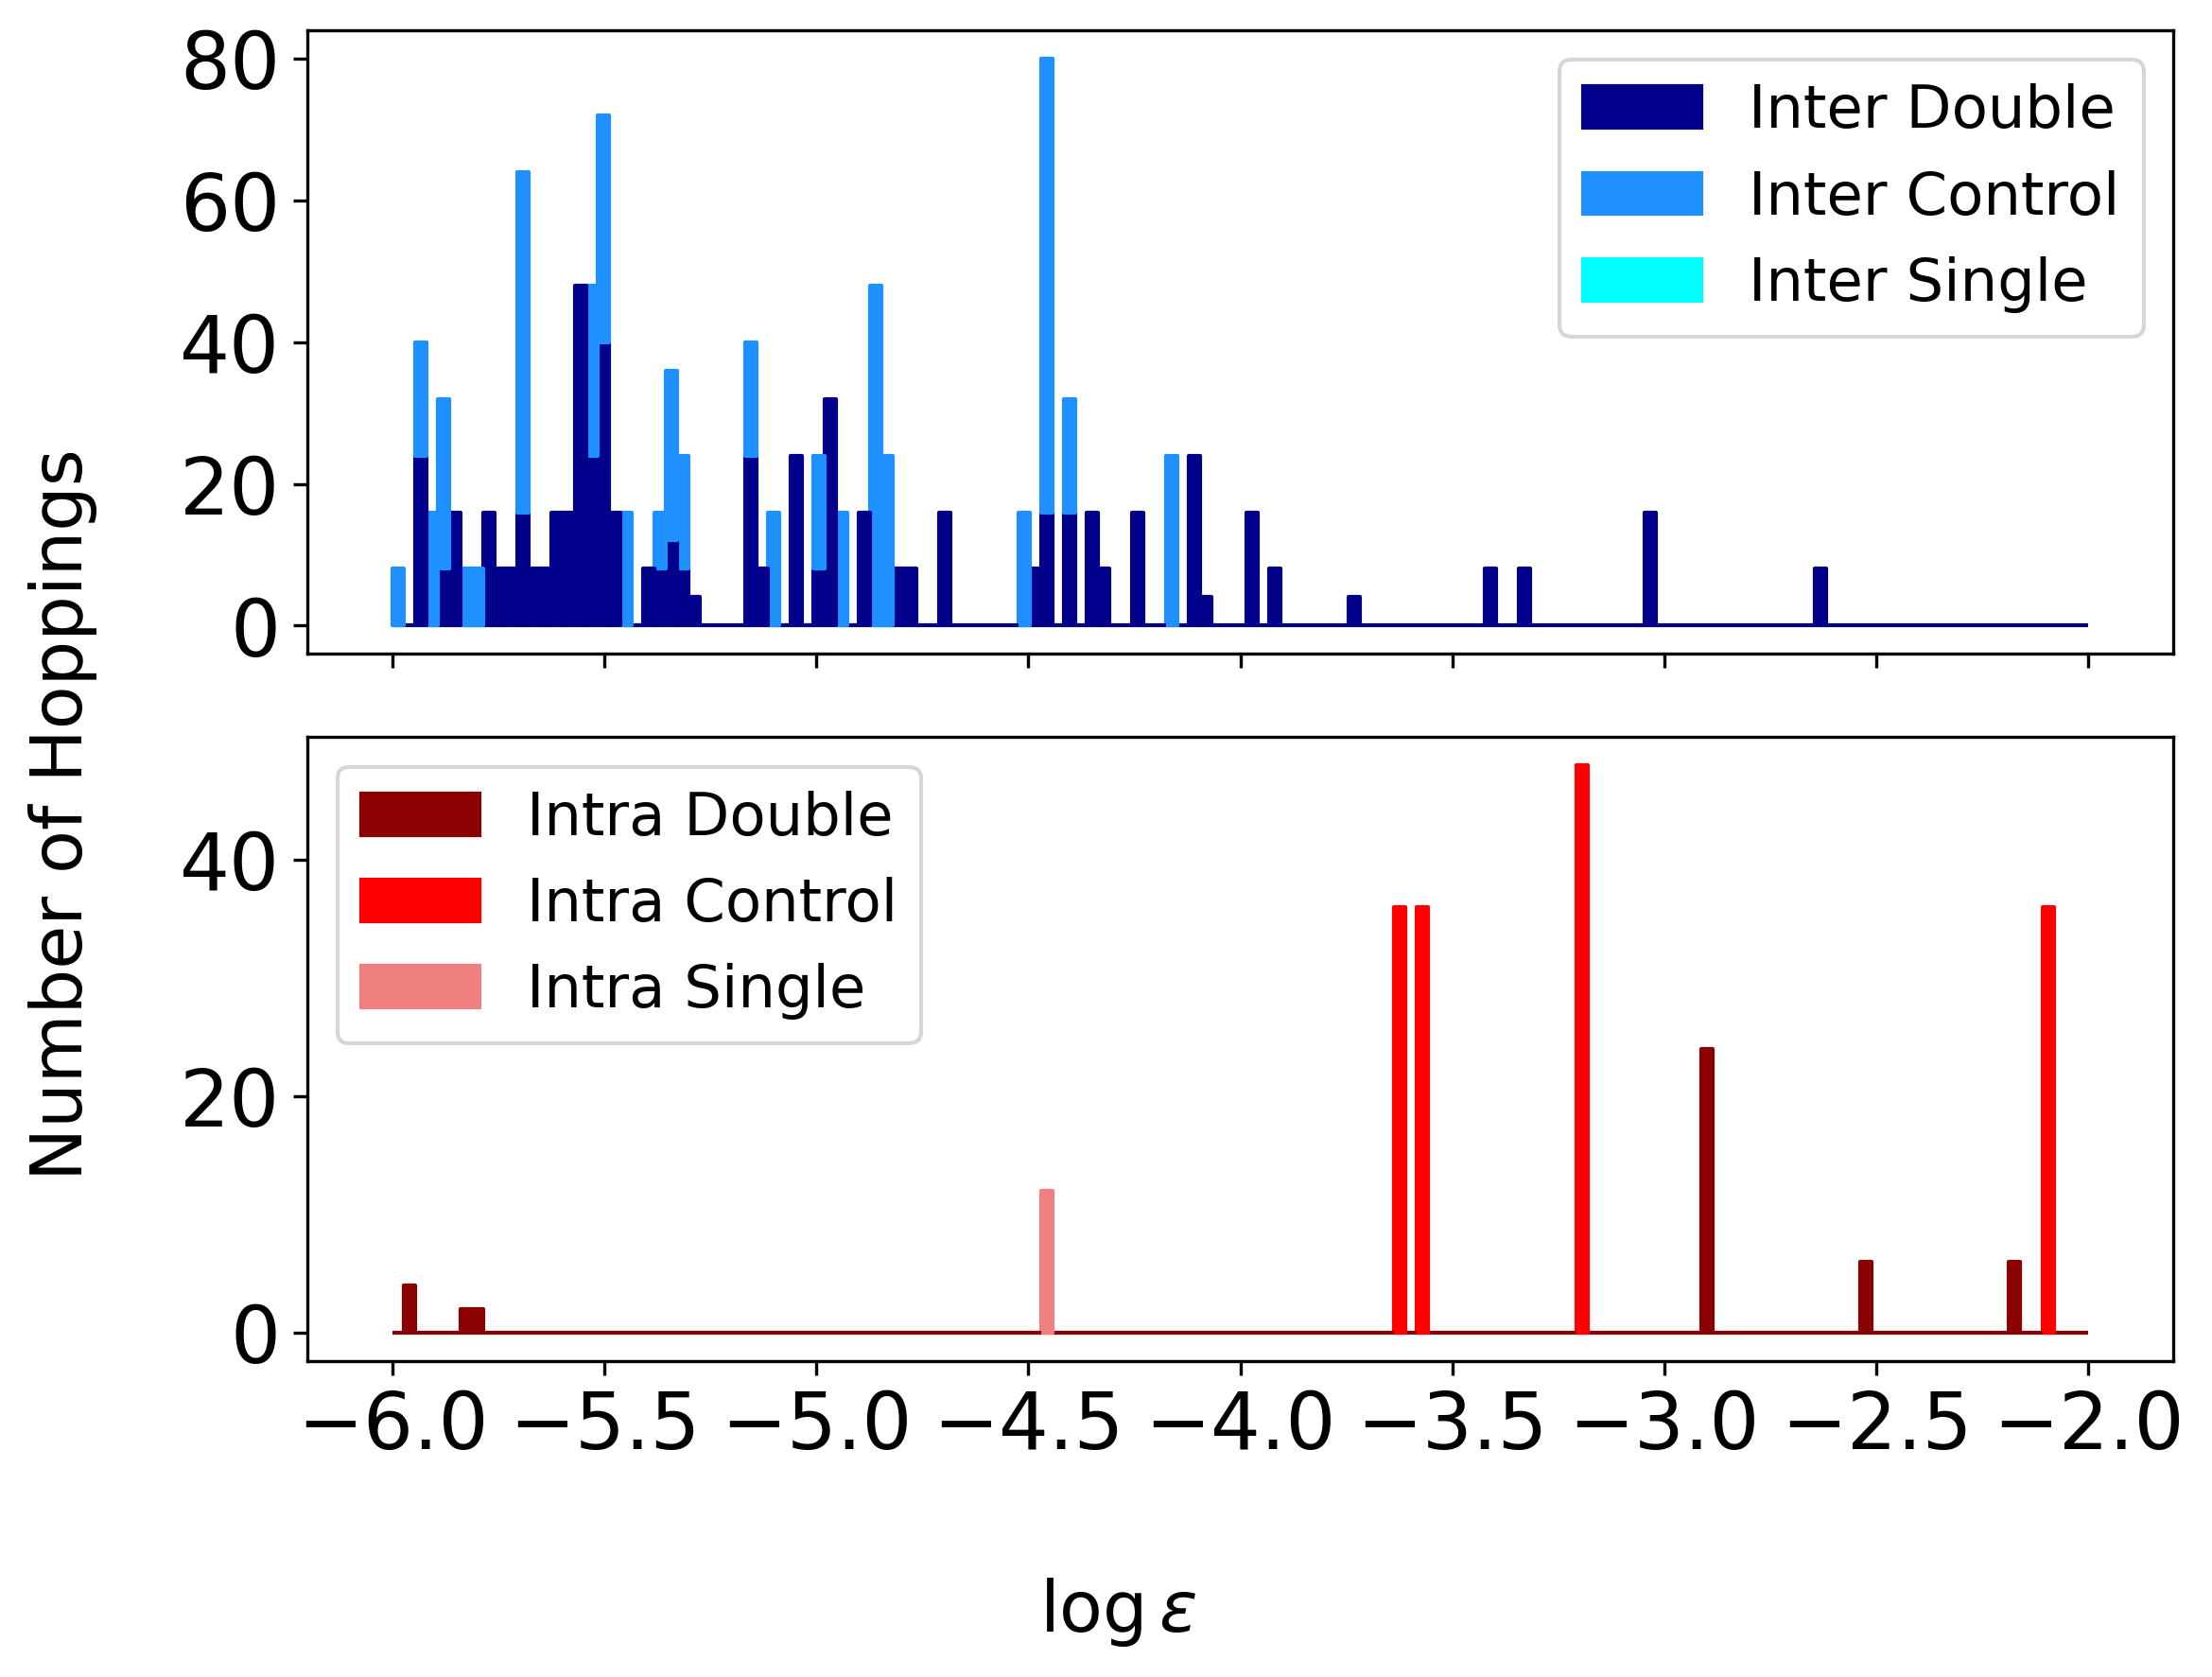

In [13]:
epsilon = 0.001
read_epsilon = 1.0
distance = 2.0
distance = float(distance)
prehead = "../H_12_cluster/"
uop, all_g = read_uop(distance, 1.0, prehead)
print(all_g)
epsilon_lst = [3e-3, 1e-3, 7e-4, 5e-4, 3e-4, 1e-4, 7e-5, 5e-5, 3e-5, 1e-5]
# epsilon_lst = [1e-3, 7e-4, 5e-4]
epsilon_lst = np.linspace(2,6,150)
epsilon_lst = 10**-(epsilon_lst)
f_orbs = [2,2,2,2,2,2]
epsilon_lst = np.array(epsilon_lst)
seam_lst = [8,16]
# seam_lst = [12,12]
plt.figure(dpi=300)
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_fig3(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=False)
plt.rcParams.update({'font.size': 20})  # Update font size

# inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, [8,16],epsilon_lst, f_orbs)

In [11]:
def plot_area(uop, all_g, epsilon_min, seam_lst, epsilon_lst, f_orbs, total = True, ifinter = True, ifintra = True):
    e_min = np.log10(epsilon_min)//1
    print(e_min)
    nbins = len(epsilon_lst) - 1
    intra_double = np.zeros(nbins)
    inter_double = np.zeros(nbins)
    intra_control = np.zeros(nbins)
    inter_control = np.zeros(nbins)
    intra_single = np.zeros(nbins)
    inter_single = np.zeros(nbins)
    a_index = uop.a_idxs
    i_index = uop.i_idxs
    for epsilon_index in range(len(epsilon_lst) - 1):
        epsilon_min = epsilon_lst[epsilon_index+1]
        if total:
            epsilon_max = np.inf
        else:
            epsilon_max = epsilon_lst[epsilon_index]
        for [gradient, i] in all_g:
            gradient = abs(gradient)
            if gradient > epsilon_min and gradient < epsilon_max:
                area = 0
                cur_index = epsilon_index
                cur_a = a_index[i].copy()
                cur_i = i_index[i].copy()
                cur_excitation = [[cur_a, cur_i]]
                cur_excitation = orbital_reordering(cur_excitation,f_orbs)
                cur_a, cur_i = cur_excitation[0]
                # print(cur_a, cur_i)
                if len(cur_a) == 1:
                    if cur_a == cur_i:
                        print("single evolution")
                    else:
                        # print("single hopping")
                        i1 = min([cur_a[0], cur_i[0]])
                        i2 = max([cur_a[0], cur_i[0]])
                        area = (i2 - i1) * 2 * (i2 - i1)
                        area = area * 2
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_single[cur_index] += area
                        else:
                            intra_single[cur_index] += area
                if len(cur_a) == 2:
                    cur_a.sort()
                    cur_i.sort()
                    p,q = cur_a
                    k,m = cur_i
                    if set(cur_a) & set(cur_i) != set():
                        j = list(set(cur_a) & set(cur_i))
                        j = j[0]
                        p,q = list(set(cur_a) ^ set(cur_i))
                        i1 = min([p,q,j])
                        i2 = max([p,q,j])
                        if j < i1:
                            area = 2*(i2-i1 + 1) * (i2-j) +2*(i2-i1)*(i2-i1)
                        elif j>i2:
                            area = 2*(j - i1 + 1) * (j - i1) +2*(i2-i1)*(i2-i1)
                        else:
                            area = (j-1-i1 + i2-(j+1) + 1) * (i2-i1) * 2 + (i2-i1) * 2 * (i2-i1)
                        area = area * 2
                        
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_control[cur_index] += area
                        else:
                            intra_control[cur_index] += area
                    else:
                        index_lst = [p,q,k,m]
                        index_lst.sort()
                        i1,i2,i3,i4 = index_lst
                        area = ((i2 - i1) + (i4 - i3) + 1) * 2 * (i4 - i1)
                        area = area * 8
                        if (i1 < seam_lst[0] and i4>=seam_lst[0]) or (i1 < seam_lst[1] and i4>=seam_lst[1]):
                            inter_double[cur_index] += area
                        else:
                            intra_double[cur_index] += area
    colors = ["darkblue", "dodgerblue", "cyan", "darkred", "red", "lightcoral"]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), dpi=300)
    for i in range(nbins):
        start = 0
        # Plot inter hopping
        ax1.fill_betweenx([start, start+inter_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[0])
        start += inter_double[i]
        if inter_control[i]!=0:
            ax1.fill_betweenx([start, start+inter_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[1])
            start += inter_control[i]
        if inter_single[i]!=0:
            ax1.fill_betweenx([start, start+inter_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[2])
        # Intra hopping
        start = 0
        ax2.fill_betweenx([start, start+intra_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[3])
        start += intra_double[i]
        if intra_control[i]!=0:
            ax2.fill_betweenx([start, start+intra_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[4])
            start += intra_control[i]
        if intra_single[i]!=0:
            ax2.fill_betweenx([start, start+intra_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[5])
            start += intra_single[i]

    inter_legend_handles = [
    mpatches.Patch(color=colors[0], label='Inter Double'),
    mpatches.Patch(color=colors[1], label='Inter Control'),
    mpatches.Patch(color=colors[2], label='Inter Single'),
    ]
    intra_legend_handles = [
    mpatches.Patch(color=colors[3], label='Intra Double'),
    mpatches.Patch(color=colors[4], label='Intra Control'),
    mpatches.Patch(color=colors[5], label='Intra Single'),
    ]
    plt.rcParams.update({'font.size': 15})  # Update font size
    ax1.legend(handles=inter_legend_handles)
    ax2.legend(handles=intra_legend_handles)
    fig.supxlabel(r"$\log{\epsilon}$")
    fig.supylabel("area of hoppings")
    plt.tight_layout()
    plt.show()

    return inter_single, intra_single, inter_control, intra_control, inter_double, intra_double

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
[[-1.7932054976798955e-07, 0], [-1.7932054976484706e-07, 1], [3.571916854600649e-05, 2], [3.5719168546006194e-05, 3], [-3.573690247375238e-05, 4], [-3.573690247375422e-05, 5], [1.7847178542875336e-07, 6], [1.784717854294005e-07, 7], [3.5768358386620204e-11, 8], [3.5768358386567316e-11, 9], [6.005944284940084e-09, 10], [6.005944284940193e-09, 11], [3.060863720746368e-11, 12], [3.060863720770171e-11, 13], [-4.432403571977981e-09, 14], [-4.432403571977513e-09, 15], [-4.4847046043175886e-09, 16], [-4.4847046043177424e-09, 17], [-2.0337321952452527e-11, 18], [-2.0337321952447612e-11, 19], [4.413665331419802e-09, 20], [4.41366533141969e-09, 21], [-3.038616377561558e-11, 22], [-3.038616377556598e-11, 23], [-2.2239280905878308e-12, 24], [-2.2239280905810195e-12, 25], [-3.818748708309844e-09, 26], [-3.818748708309836e-09, 27], [-2.7355884474345777e-11, 28], [-2.7355884474372195e-11, 29], [4.4979703726575255e-09, 3

<Figure size 1920x1440 with 0 Axes>

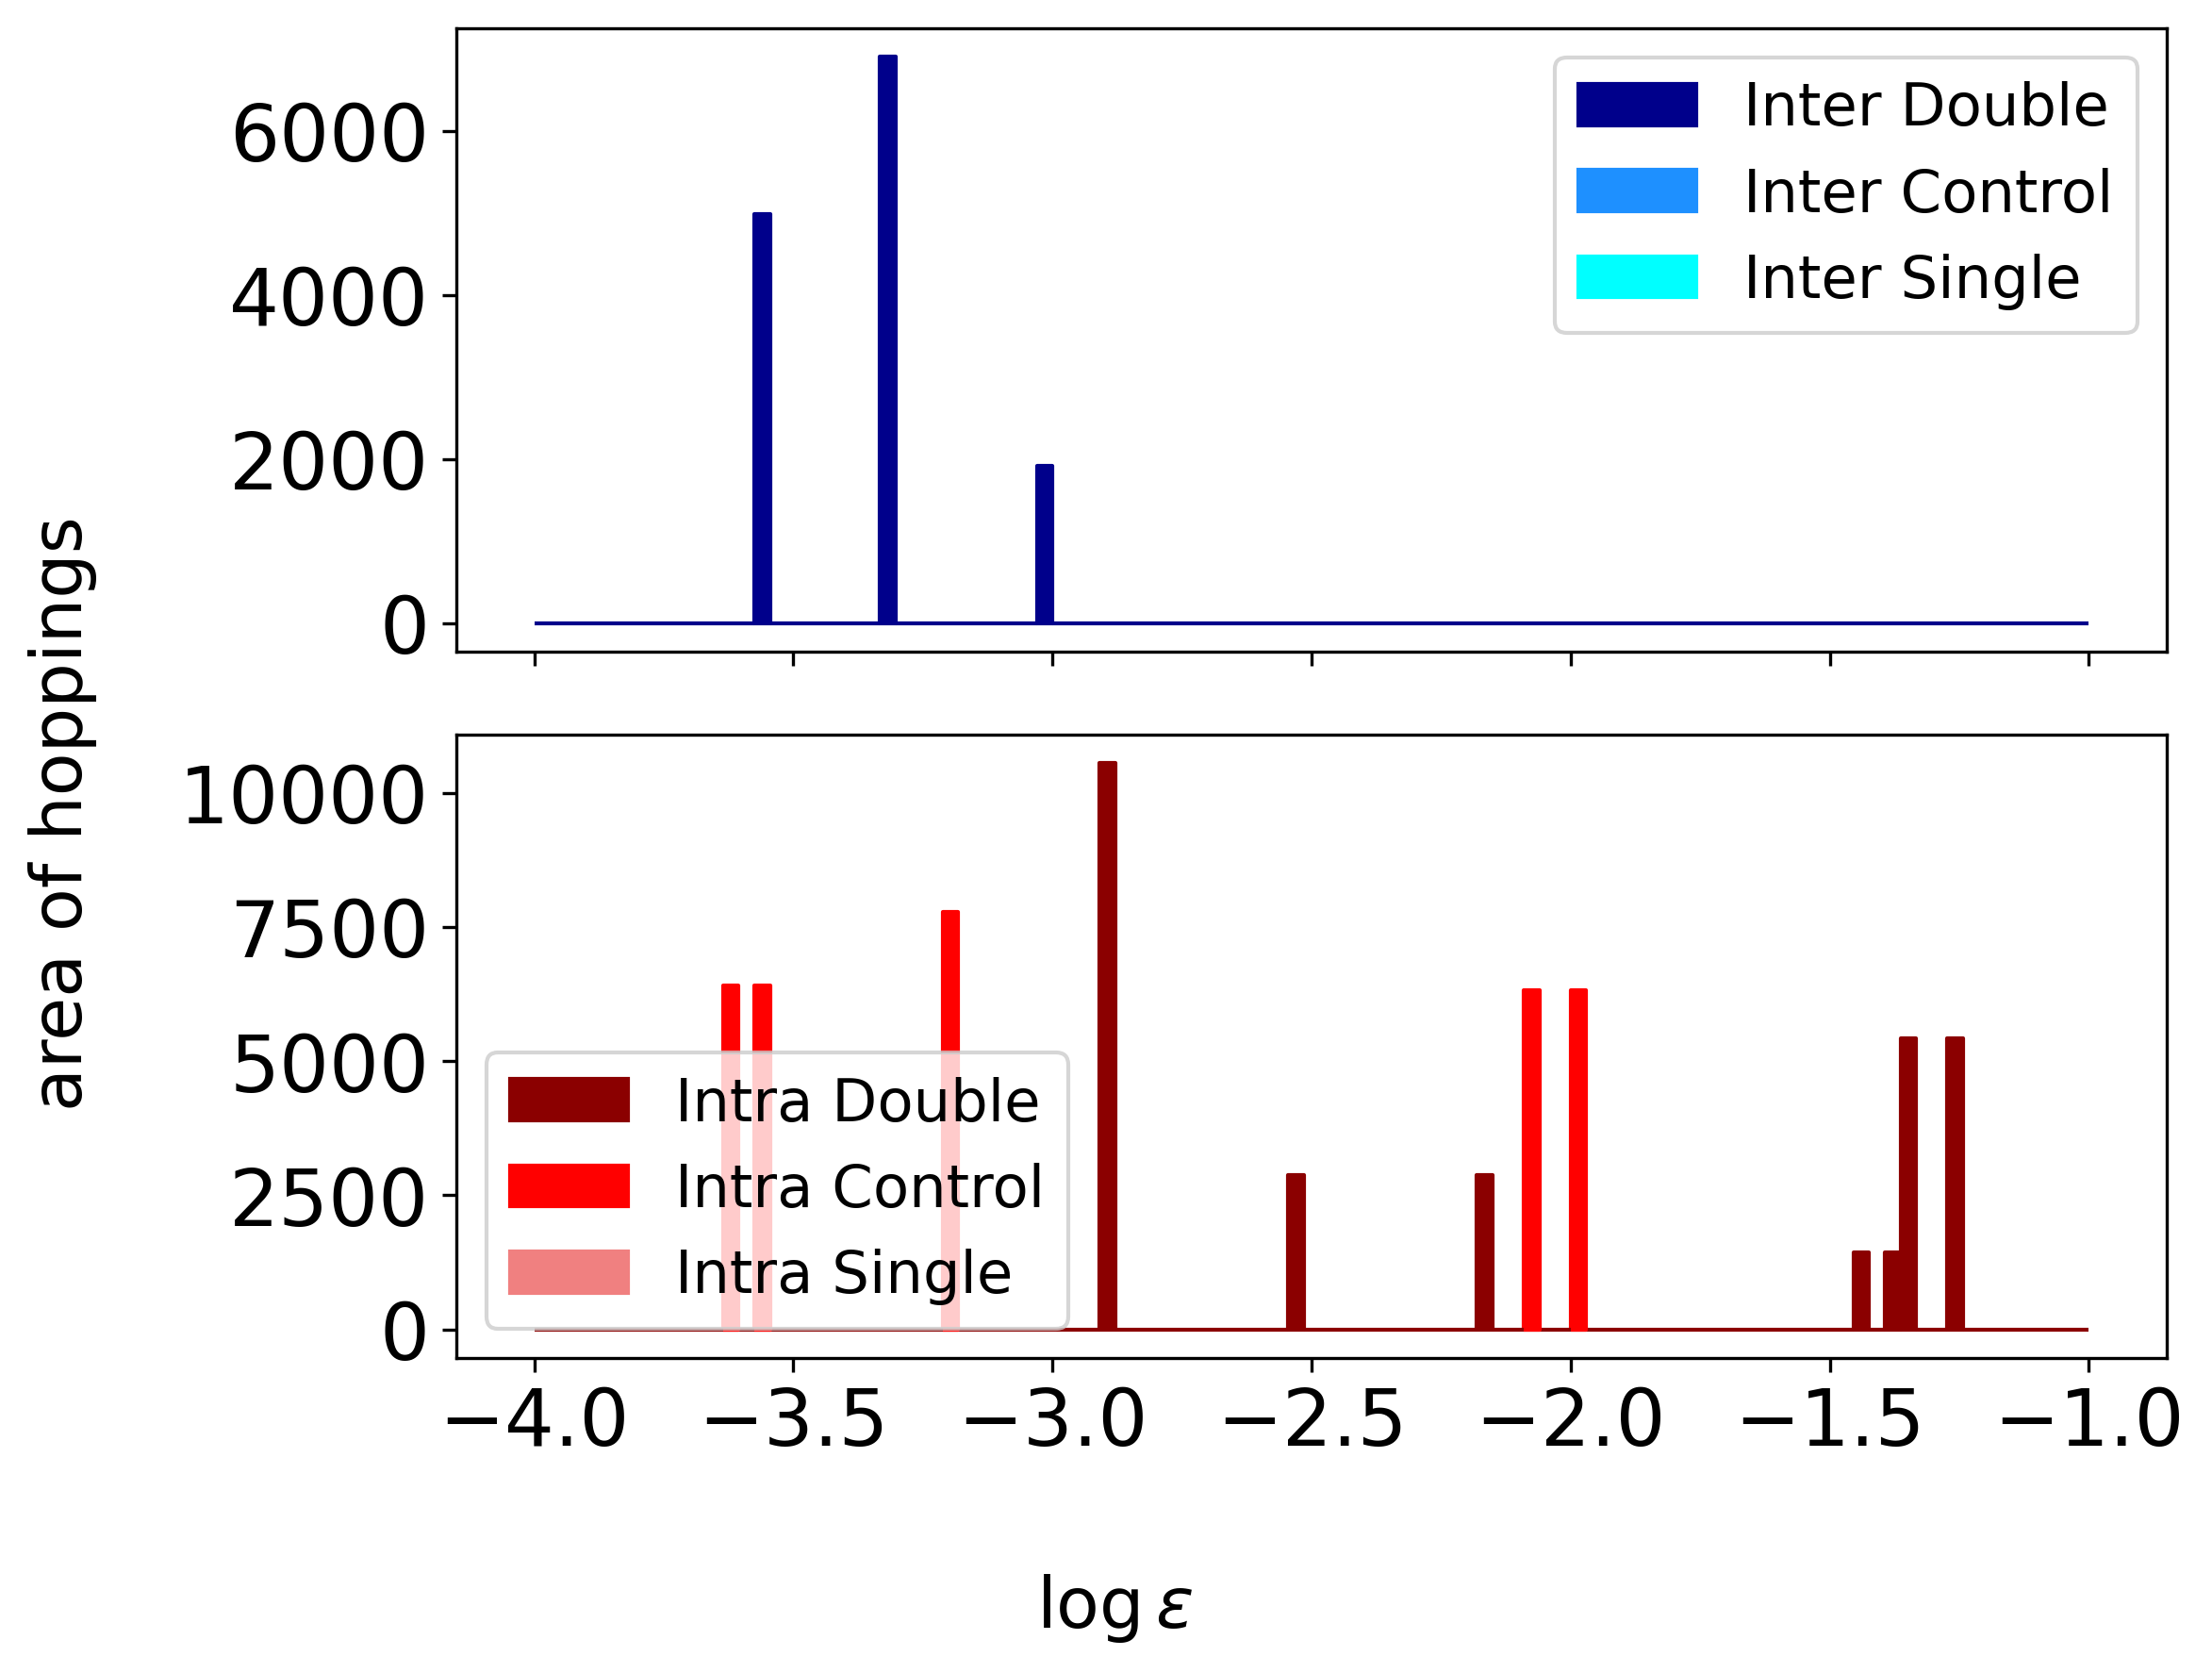

In [12]:
epsilon = 0.001
read_epsilon = 1.0
distance = 3
distance = float(distance)
prehead = "../H_12_cluster/"
uop, all_g = read_uop(distance, 1.0, prehead)
print(all_g)
epsilon_lst = [3e-3, 1e-3, 7e-4, 5e-4, 3e-4, 1e-4, 7e-5, 5e-5, 3e-5, 1e-5]
# epsilon_lst = [1e-3, 7e-4, 5e-4]
epsilon_lst = np.linspace(1,4,100)
epsilon_lst = 10**-(epsilon_lst)
f_orbs = [2,2,2,2,2,2]
epsilon_lst = np.array(epsilon_lst)
seam_lst = [8,16]
# seam_lst = [12,12]
plt.figure(dpi=300)
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_area(uop, all_g, 1e-10, seam_lst,epsilon_lst, f_orbs, total=False)
plt.rcParams.update({'font.size': 15})  # Update font size

# inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, [8,16],epsilon_lst, f_orbs)

In [13]:
def find_index(gradient, epsilon_lst):
    index = -1
    for i in range(1, len(epsilon_lst)):
        if gradient < epsilon_lst[i-1] and gradient > epsilon_lst[i]:
            index = i-1
            return index
    IndexError("index not found")

def plot_normalized_histogram(uop, all_g, epsilon_min, seam_lst, epsilon_lst, f_orbs, total = True, ifinter = True, ifintra = True):
    e_min = np.log10(epsilon_min)//1
    print(e_min)
    nbins = len(epsilon_lst) - 1
    intra_double = np.zeros(nbins)
    inter_double = np.zeros(nbins)
    intra_control = np.zeros(nbins)
    inter_control = np.zeros(nbins)
    intra_single = np.zeros(nbins)
    inter_single = np.zeros(nbins)
    a_index = uop.a_idxs
    i_index = uop.i_idxs
    for epsilon_index in range(len(epsilon_lst) - 1):
        epsilon_min = epsilon_lst[epsilon_index+1]
        if total:
            epsilon_max = np.inf
        else:
            epsilon_max = epsilon_lst[epsilon_index]
        for [gradient, i] in all_g:
            gradient = abs(gradient)
            area = 0
            cur_index = epsilon_index
            cur_a = a_index[i].copy()
            cur_i = i_index[i].copy()
            cur_excitation = [[cur_a, cur_i]]
            cur_excitation = orbital_reordering(cur_excitation,f_orbs)
            cur_a, cur_i = cur_excitation[0]
            # print(cur_a, cur_i)
            if len(cur_a) == 1:
                if cur_a == cur_i:
                    print("single evolution")
                else:
                    # print("single hopping")
                    i1 = min([cur_a[0], cur_i[0]])
                    i2 = max([cur_a[0], cur_i[0]])
                    area = (i2 - i1) * 2 * (i2 - i1)
                    area = area * 2
                    norm_g = gradient / area
                    if norm_g > epsilon_min and norm_g < epsilon_max:
                        cur_index = find_index(norm_g, epsilon_lst)
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_single[cur_index] += area
                        else:
                            intra_single[cur_index] += area
                    
            if len(cur_a) == 2:
                cur_a.sort()
                cur_i.sort()
                p,q = cur_a
                k,m = cur_i
                if set(cur_a) & set(cur_i) != set():
                    j = list(set(cur_a) & set(cur_i))
                    j = j[0]
                    p,q = list(set(cur_a) ^ set(cur_i))
                    i1 = min([p,q,j])
                    i2 = max([p,q,j])
                    if j < i1:
                        area = 2*(i2-i1 + 1) * (i2-j) +2*(i2-i1)*(i2-i1)
                    elif j>i2:
                        area = 2*(j - i1 + 1) * (j - i1) +2*(i2-i1)*(i2-i1)
                    else:
                        area = (j-1-i1 + i2-(j+1) + 1) * (i2-i1) * 2 + (i2-i1) * 2 * (i2-i1)
                    area = area * 2
                    norm_g = gradient/area
                    if norm_g > epsilon_min and norm_g < epsilon_max:
                        cur_index = find_index(norm_g, epsilon_lst)
                        if (i1 < seam_lst[0] and i2>=seam_lst[0]) or (i1 < seam_lst[1] and i2>=seam_lst[1]):
                            inter_control[cur_index] += area
                        else:
                            intra_control[cur_index] += area
                else:
                    index_lst = [p,q,k,m]
                    index_lst.sort()
                    i1,i2,i3,i4 = index_lst
                    area = ((i2 - i1) + (i4 - i3) + 1) * 2 * (i4 - i1)
                    area = area * 8
                    norm_g = gradient/area
                    if norm_g > epsilon_min and norm_g < epsilon_max:
                        cur_index = find_index(norm_g, epsilon_lst)
                        if (i1 < seam_lst[0] and i4>=seam_lst[0]) or (i1 < seam_lst[1] and i4>=seam_lst[1]):
                            inter_double[cur_index] += area
                        else:
                            intra_double[cur_index] += area
    colors = ["darkblue", "dodgerblue", "cyan", "darkred", "red", "lightcoral"]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), dpi=300)
    for i in range(nbins):
        start = 0
        # Plot inter hopping
        ax1.fill_betweenx([start, start+inter_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[0])
        start += inter_double[i]
        if inter_control[i]!=0:
            ax1.fill_betweenx([start, start+inter_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[1])
            start += inter_control[i]
        if inter_single[i]!=0:
            ax1.fill_betweenx([start, start+inter_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[2])
        # Intra hopping
        start = 0
        ax2.fill_betweenx([start, start+intra_double[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[3])
        start += intra_double[i]
        if intra_control[i]!=0:
            ax2.fill_betweenx([start, start+intra_control[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[4])
            start += intra_control[i]
        if intra_single[i]!=0:
            ax2.fill_betweenx([start, start+intra_single[i]], np.log10(epsilon_lst[i]),np.log10(epsilon_lst[i+1]), color=colors[5])
            start += intra_single[i]

    inter_legend_handles = [
    mpatches.Patch(color=colors[0], label='Inter Double'),
    mpatches.Patch(color=colors[1], label='Inter Control'),
    mpatches.Patch(color=colors[2], label='Inter Single'),
    ]
    intra_legend_handles = [
    mpatches.Patch(color=colors[3], label='Intra Double'),
    mpatches.Patch(color=colors[4], label='Intra Control'),
    mpatches.Patch(color=colors[5], label='Intra Single'),
    ]
    plt.rcParams.update({'font.size': 15})  # Update font size
    ax1.legend(handles=inter_legend_handles)
    ax2.legend(handles=intra_legend_handles)
    fig.supxlabel(r"$\log{\epsilon}$")
    fig.supylabel("number of hoppings")
    plt.tight_layout()
    plt.show()

    return inter_single, intra_single, inter_control, intra_control, inter_double, intra_double

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
[[-2.8656498188279453e-07, 0], [-2.865649818778123e-07, 1], [-3.5750601312576075e-05, 2], [-3.575060131257953e-05, 3], [-3.5741794065985006e-05, 4], [-3.574179406598751e-05, 5], [-2.8448723922279377e-07, 6], [-2.844872392256669e-07, 7], [6.959645000561742e-10, 8], [6.959645000578682e-10, 9], [-1.600517494246405e-07, 10], [-1.6005174942463596e-07, 11], [1.55618355487985e-09, 12], [1.5561835548676219e-09, 13], [-3.9109184868169743e-08, 14], [-3.910918486813698e-08, 15], [-9.245745363450318e-08, 16], [-9.245745363449862e-08, 17], [1.5179052440242747e-09, 18], [1.5179052440242714e-09, 19], [3.860468750584545e-08, 20], [3.860468750582719e-08, 21], [-1.5521028715561577e-09, 22], [-1.5521028715595324e-09, 23], [1.730304199812143e-10, 24], [1.7303041997994416e-10, 25], [-1.949436844344158e-08, 26], [-1.949436844343934e-08, 27], [3.8152641081491307e-10, 28], [3.8152641080990356e-10, 29], [-9.299497742697654e-08, 3

<Figure size 1920x1440 with 0 Axes>

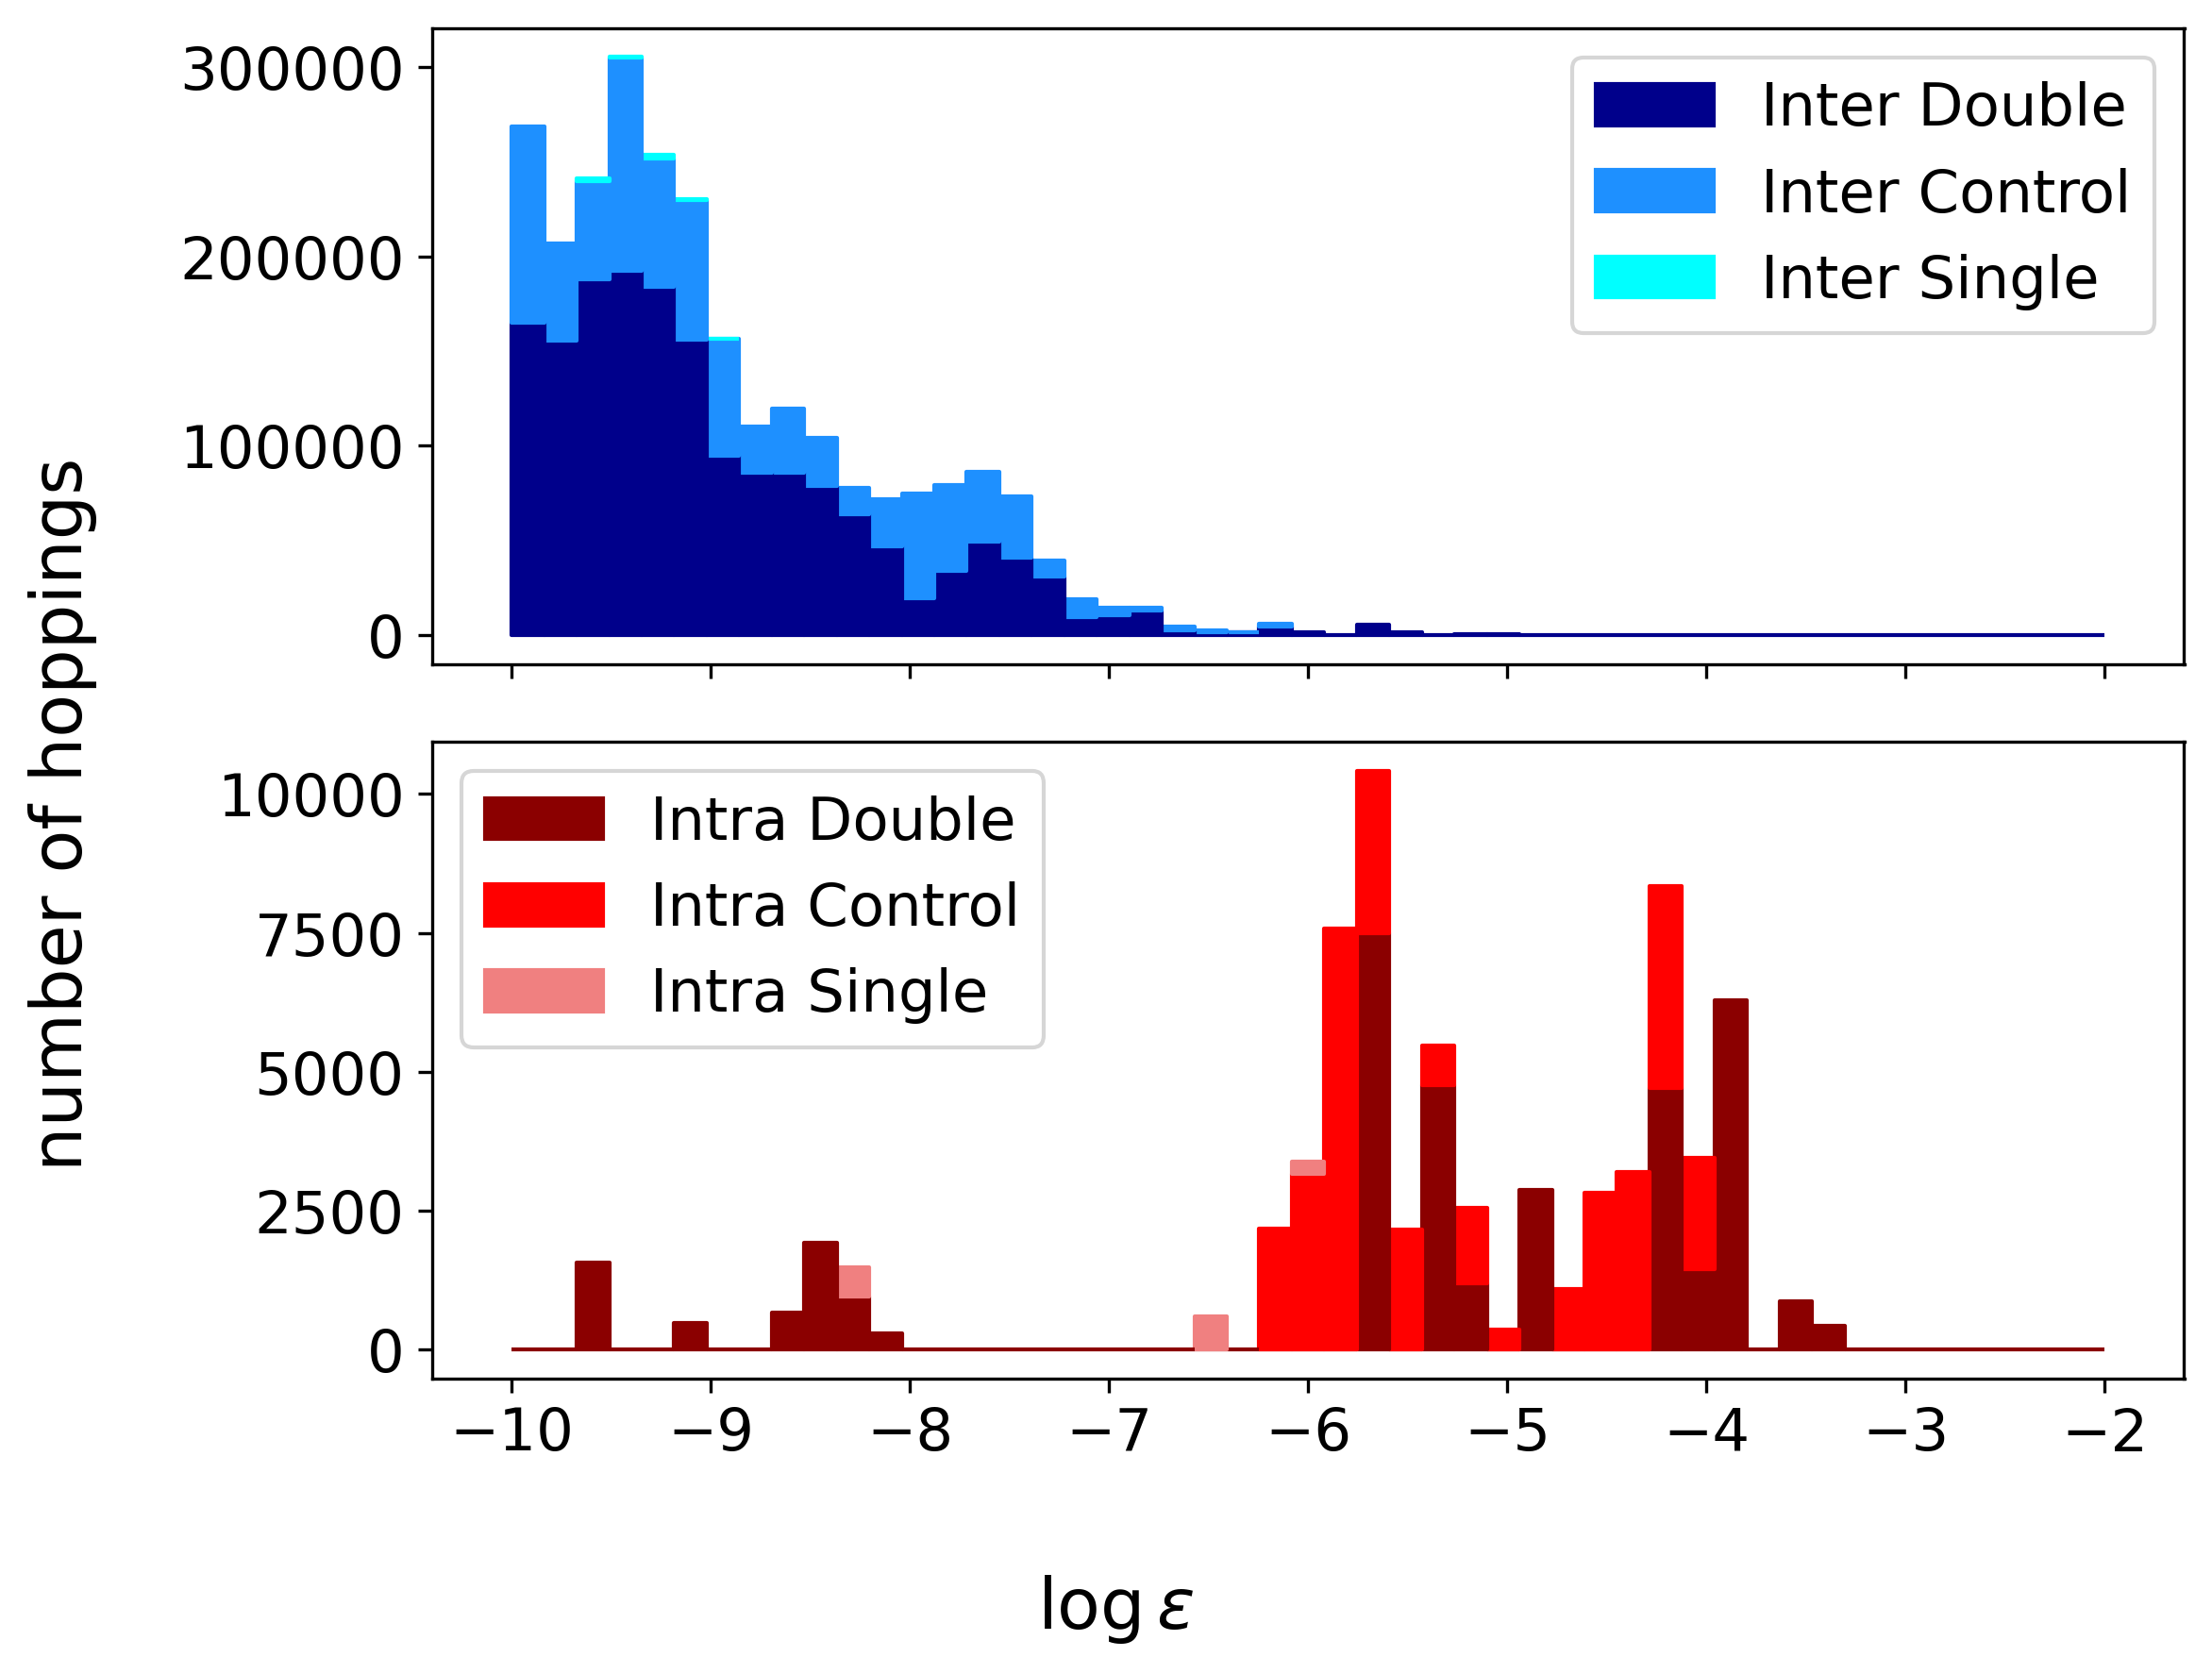

In [14]:
epsilon = 0.001
read_epsilon = 1.0
distance = 2.0
distance = float(distance)
prehead = "../H_12_cluster/"
uop, all_g = read_uop(distance, 1.0, prehead)
print(all_g)
epsilon_lst = [3e-3, 1e-3, 7e-4, 5e-4, 3e-4, 1e-4, 7e-5, 5e-5, 3e-5, 1e-5]
# epsilon_lst = [1e-3, 7e-4, 5e-4]
epsilon_lst = np.linspace(2,10,50)
epsilon_lst = 10**-(epsilon_lst)
f_orbs = [2,2,2,2,2,2]
epsilon_lst = np.array(epsilon_lst)
seam_lst = [8,16]
# seam_lst = [12,12]
plt.figure(dpi=300)
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_normalized_histogram(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=False)
plt.rcParams.update({'font.size': 15})  # Update font size
# inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, [8,16],epsilon_lst, f_orbs)

In [15]:
print(inter_single)

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.  144.  784. 2080.  400. 1296.    0.
    0.]


Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
[[-2.458181247675343e-08, 0], [-2.4581812476302833e-08, 1], [-3.4458688586343884e-05, 2], [-3.445868858634532e-05, 3], [-3.4408990200624566e-05, 4], [-3.4408990200625854e-05, 5], [-2.114110826626797e-08, 6], [-2.1141108266484386e-08, 7], [2.2392288129458054e-09, 8], [2.239228812945808e-09, 9], [-5.044739568661902e-08, 10], [-5.044739568661493e-08, 11], [2.302538862841205e-10, 12], [2.3025388629172436e-10, 13], [-4.1111488449425295e-07, 14], [-4.1111488449424655e-07, 15], [4.725926920692141e-08, 16], [4.725926920692484e-08, 17], [-6.160690464813026e-10, 18], [-6.160690464813438e-10, 19], [4.109888778740713e-07, 20], [4.109888778740716e-07, 21], [-2.3258173540865314e-10, 22], [-2.3258173541040847e-10, 23], [4.024362456321087e-12, 24], [4.024362456375629e-12, 25], [-3.9500675431513373e-10, 26], [-3.950067543149923e-10, 27], [2.222454995058596e-09, 28], [2.2224549950586764e-09, 29], [4.7281398136798064e-08, 3

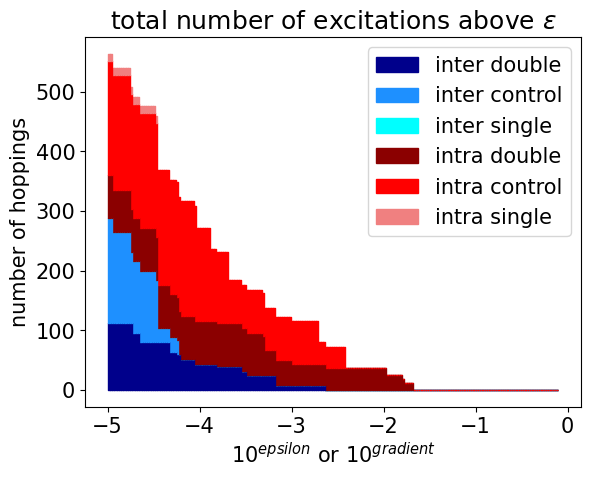

-5.0


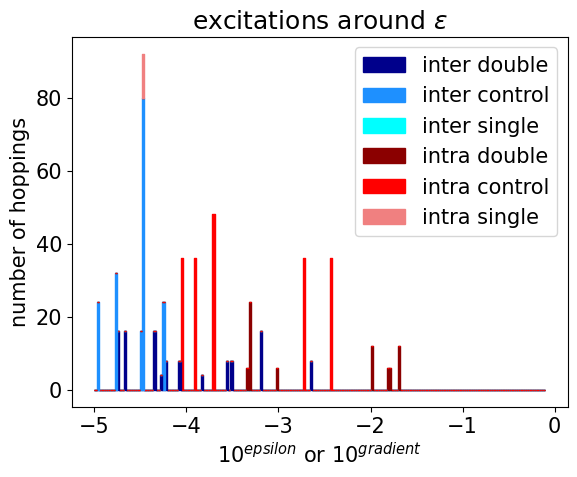

In [16]:
epsilon = 0.001
read_epsilon = 0.0
distance = 1.5
distance = float(distance)
prehead = "../data_H_12/"
uop, all_g = read_uop(distance, read_epsilon,prehead)
print(all_g)
epsilon_lst = [3e-3, 1e-3, 7e-4, 5e-4, 3e-4, 1e-4, 7e-5, 5e-5, 3e-5, 1e-5]
# epsilon_lst = [1e-3, 7e-4, 5e-4]
epsilon_lst = np.linspace(0.1,5,200)
epsilon_lst = 10**-(epsilon_lst)
f_orbs = [2,2,2,2,2,2]
epsilon_lst = np.array(epsilon_lst)
seam_lst = [8,16]
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=True)
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=False)

-5.0


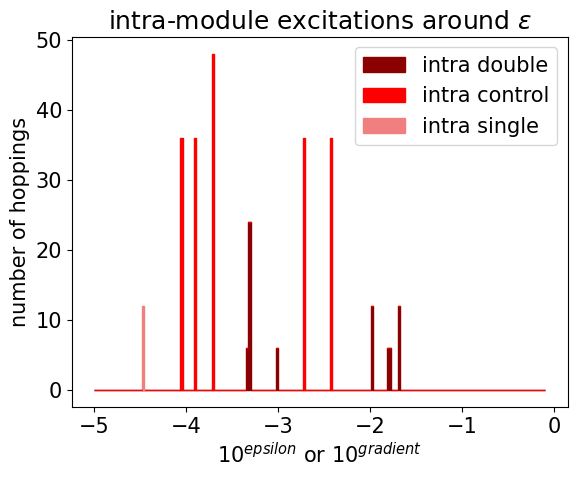

In [17]:
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, [8,16],epsilon_lst, f_orbs, total=False, ifinter=False)


-5.0


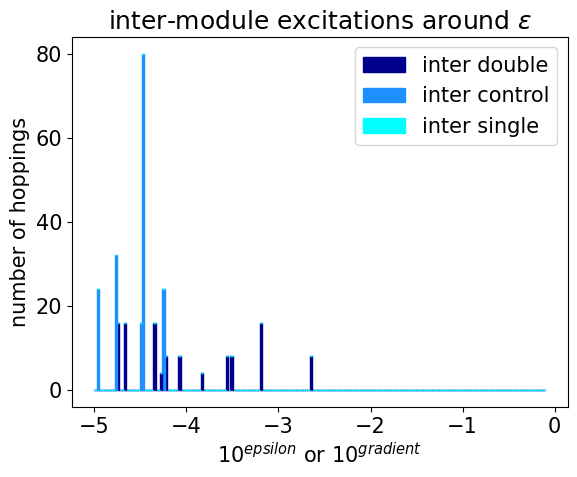

In [18]:
inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, [8,16],epsilon_lst, f_orbs, total=False, ifintra=False)


In [19]:
print(f"The total number of excitations when e = {epsilon_lst[-1]} is")
print(intra_control[-1] + inter_control[-1] + intra_double[-1] + inter_double[-1] + intra_single[-1] + inter_single[-1])

The total number of excitations when e = 1e-05 is
0.0


In [20]:
def create_excitation(uop, all_g, epsilon):
    excitations = []
    a_index = uop.a_idxs
    i_index = uop.i_idxs
    for [gradient, i] in all_g:
        gradient = abs(gradient)
        if gradient > epsilon:
            cur_a = a_index[i].copy()
            cur_i = i_index[i].copy()
            cur_excitation = [cur_a, cur_i]
            excitations.append(cur_excitation)
    return excitations

In [21]:
epsilon = 1e-3
seam_lst = [12]
ratio = 4
excitations = create_excitation(uop, all_g, epsilon)
excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
# tiles = process_tiles(tiles, ratio, seam_lst)
filename = "../test_tiles.txt"
print(f"The length of excitations of epsilon = {epsilon} from raw data is")
print(len(excitations))
# tiles = create_circuit_tile(excitations)
tiles = sorted(tiles, key=lambda x: sum(w * h for w, h, _, _ in x), reverse=True)
export_tiles_to_file(tiles, filename)

The length of excitations of epsilon = 0.001 from raw data is
116
Tiles successfully exported to ../test_tiles.txt


In [22]:
import subprocess

print(os.getcwd())

# Run the C executable directly (assuming it's compiled and named 'tile_packing.exe')
subprocess.run(["./lib/tile_packing.exe", "output.txt"])


filename = '../placed_tiles.txt'
bounding_width, placed_tiles = read_placed_tiles(filename)
print(placed_tiles)
placed_tiles = TilePacker(placed_tiles, bounding_width, N)
placed_tiles.draw_packing([],seam_lst,epsilon,inter_color="blue")
placed_tiles.draw_packing([],seam_lst,epsilon,inter_color="blue")



c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src


KeyboardInterrupt: 